In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Figure和Subplot
matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

不能通过空Figure绘图，必须用add_subplot创建一个或多个subplot才行：

In [3]:
# 创建2x2的图像，且当前选中的4个subplot中的第一个（编号从1开始）
ax1 = fig.add_subplot(2, 2, 1)

In [4]:
ax2 = fig.add_subplot(2, 2, 2)

In [5]:
ax3 = fig.add_subplot(2, 2, 3)

In [6]:
from numpy.random import randn

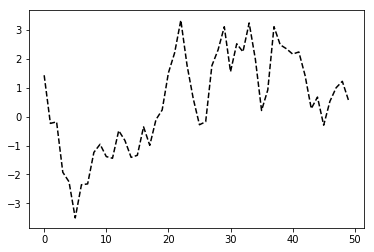

In [11]:
# 'k--'是一个线型选项，用于告诉matplotlib绘制黑色虚线图
plt.plot(randn(50).cumsum(), 'k--')

In [14]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

In [16]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

由于根据特定布局创建Figure和subplot是一个非常常见的任务，于是便出现了一个更为方便的方法（plt.subplots），它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

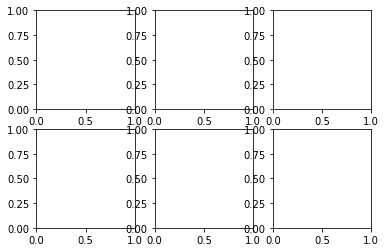

In [17]:
fig, axes = plt.subplots(2, 3)

这是非常实用的，因为可以轻松对axes数组进行索引，就好像是一个二维数组一样。

In [19]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F8FA5F8>,
      dtype=object)

### 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图形的大小，间距也会调整，利用Figure的subplots_adjust方法可以轻而易举地修改间距。

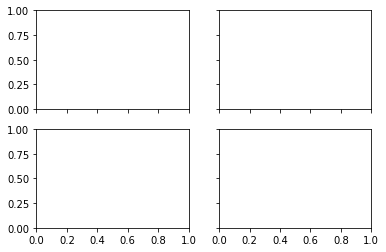

In [26]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [27]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
# map(lambda x: x.hist(randn(500), bins=50, color='k', alpha=0.5), axes)

In [28]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001286DB70>,
      dtype=object)

In [29]:
plt.subplots_adjust(wspace=0, hspace=0)

<Figure size 432x288 with 0 Axes>

### 颜色、标记和线型
matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码

In [32]:
# axes[0, 0].plot(x, y, 'g--')

In [33]:
# ax.plot(x, y, linestyle='--', color='g')

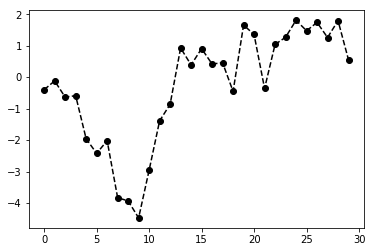

In [35]:
# 带标记的线型图
plt.plot(randn(30).cumsum(), 'ko--')

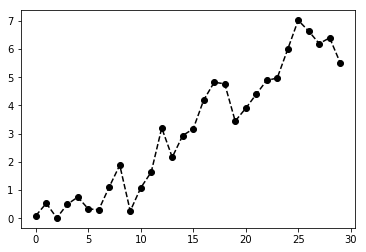

In [36]:
# 可以显示的写成
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改：

In [40]:
data = randn(30).cumsum()

In [41]:
data

array([ 2.59373314,  1.49364147,  1.86736022,  0.49441954,  0.24530883,
        1.62145377,  0.60474504,  0.8162459 ,  2.10623617,  1.14679718,
        1.19382407, -0.45877326, -1.12051276,  0.93198313,  1.91101825,
        1.19786239,  1.130492  , -0.40834564, -0.21078003, -0.36427553,
       -1.44118973, -1.64519932, -2.14254026, -2.03587425, -2.55714439,
       -2.59213224, -3.04193549, -1.36063514, -1.3528187 , -2.5877742 ])

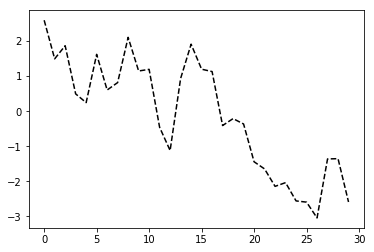

In [42]:
plt.plot(data, 'k--', label='Default')

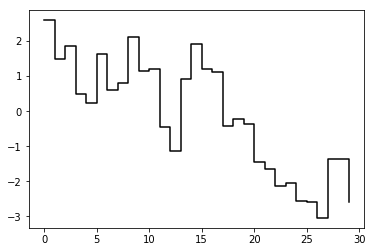

In [44]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

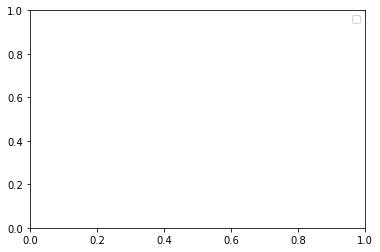

In [49]:
plt.legend(loc='best')

### 刻度、标签和图例

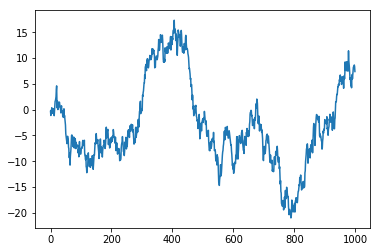

In [53]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1); ax.plot(randn(1000).cumsum())

要修改X轴的刻度，最简单的方法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的那些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签：

Text(0.5,0,'Stages')

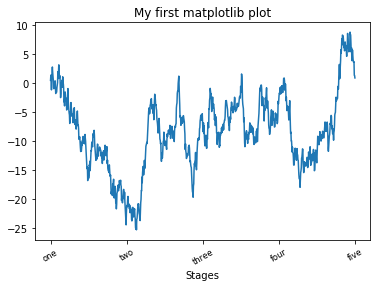

In [62]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1); ax.plot(randn(1000).cumsum())
tcks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
# 最后，再用set_xlabel将X轴设置一个名称，并用set_title设置一个标题：
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### 添加图例
图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有二。最简单的是在添加subplot的时候传入label参数：

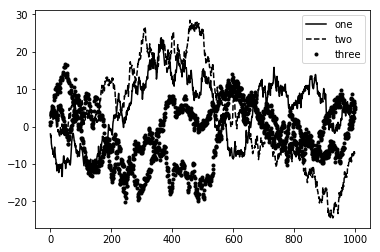

In [83]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
# 要从图例中去除一个或多个元素，不传入label或传入label='_nolegend_'即可
ax.plot(randn(1000).cumsum(), 'k.', label='_nolegend_')
# 调用ax.legend()或plt.legend()来自动创建图例；loc告诉matplotlib要将图例放在哪
ax.legend(loc='best')

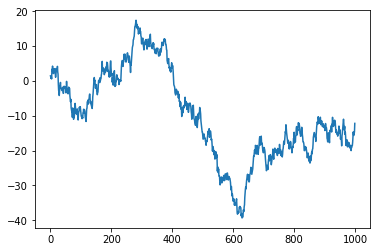

In [75]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

### 注解以及在Subplot上绘图
除标准的图标对象之外，你可能还希望绘制一些自动以的注解（比如文本，箭头或其他图形等）。

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

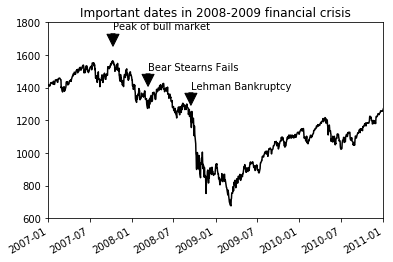

In [98]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(
        label, xy=(date, spx.asof(date) +100),
        xytext=(date, spx.asof(date) + 250),
        arrowprops=dict(facecolor='black'),
        horizontalalignment='left',
        verticalalignment='top'
    )

# 放大到2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

图形的绘制要麻烦一些。matplotlib有一些表示常见图形的图像。这些图像被称为块（patch）。其中有些可以在matplotlib.pyplot中找到（如rectangle和Circle），但完整集成位于matplotlib.patches.

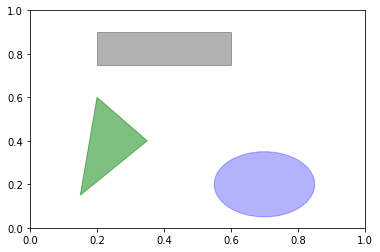

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图表保存在文件
利用plt.savefig可以将挡圈图表保存到文件。该方法相当于Figure对象的实例方法savefig。

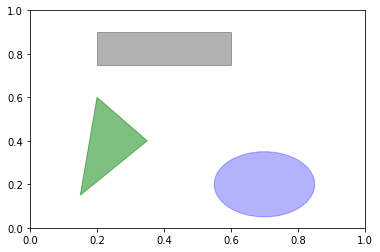

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('ch08/figpath.svg')

其中文件类型是通过文件扩展名推导出来的。因此，如果你使用的是.pdf，就会得到一个PDF文件。我在发布图片时最常用到两个重要的选项是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。要得到一张带有最小白边且分辨率为400DPI的PNG图片，你可以：

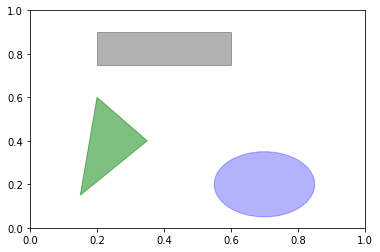

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('ch08/fig2.png', dpi=400, bbox_inches='tight')

savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如StringIO：

```python
from io import StringIO
buff = StringIO()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
ax.add_patch(rect)

plt.savefig(buff)
plot_data = buff.getvalue()
```

### matplotlib配置
matplotlib自带一些配色方案，以及为生成出版质量的图片二设置的默认配置信息。幸运的是，几乎所有默认行为都能通过一组全局参数进行自定义，他们可以管理图像大小，subplot边距、配色方案、字体大小和网格类等。

操作matplotlib配置系统的方式主要有两种。第一种为Python编程方式，即利用rc方法。

```python
plt.rc('figure', figsize=(10, 10)
```

rc的第一个参数是希望自定义的对象，如‘figure’，‘axes’,‘xtick’,‘ytick’,‘grid’,‘legend’等。其后可以跟上一系列的关键字参数。最简单的办法是将这些选项写成一个字典：

```python
font_options = {
    'family': 'monospace',
    'weight': 'bold',
    'size': 'small'
}
plt.rc('font', **font_options)
```

### pandas中的绘图函数
不难看出，matplotlib实际上是一种比较低级的工具。要组装一张图表，你得用它的各种基础组件才行；数据显示、图例、标题、刻度标签以及其他注解型信息。而pandas对其进行封装，也就是说，要制作一张完整的图表，只需要一两条简洁的语句就可以了。

#### 线型图

In [18]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

该Series对象的索引会被传给matplotlib，并用以绘制X轴，可以通过use_index=False禁用该功能。

X轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴用yticks和ylim。

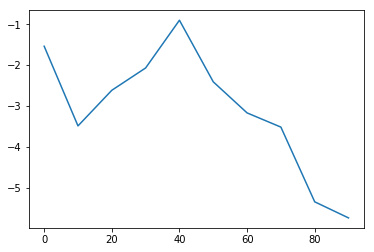

In [19]:
s.plot()

In [21]:
df = DataFrame(
    np.random.randn(10, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10)
)

In [22]:
df

,A,B,C,D
0,-0.072419,0.141039,1.316588,0.029322
10,3.253882,0.124509,0.392560,-0.155604
20,3.661414,1.406992,0.684348,0.922545
30,1.553717,0.665913,0.718996,-0.003676
40,1.848374,0.273683,1.571143,-0.388186
50,2.825331,0.202453,2.828943,-0.986798
60,1.217353,1.465075,2.567445,-2.415910
70,1.964904,2.885175,3.132965,-3.485655
80,1.010130,3.002027,3.963892,-3.330088
90,1.806373,2.556364,4.679137,-2.998419


DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例。

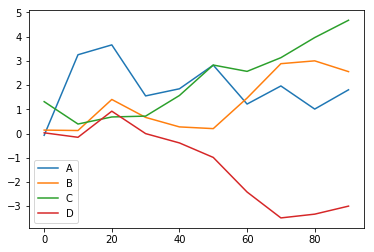

In [23]:
df.plot()

#### 柱状图
在生成线型图的代码中加上kind='bar'（垂直柱状图）或者kind='barh'（水平柱状图）即可生成柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度：

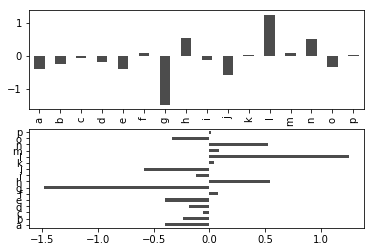

In [27]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

对于DataFrame，柱状图会将每一行的值分为一组：

In [28]:
df = DataFrame(
    np.random.rand(6, 4),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus')
)

In [29]:
df

Genus,A,B,C,D
one,0.290144,0.161132,0.225233,0.212795
two,0.341040,0.665482,0.027061,0.523154
three,0.676373,0.528046,0.582667,0.159090
four,0.312008,0.193280,0.350948,0.318035
five,0.359617,0.815760,0.265439,0.036343
six,0.042633,0.900867,0.993203,0.908440


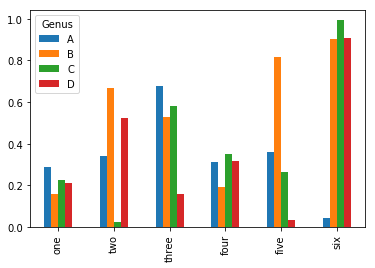

In [30]:
df.plot(kind='bar')

注意，DataFrame各列的名称‘Genus’被用作了图例的标题。设置stacked=True即可为DataFrame生成堆积柱状图。

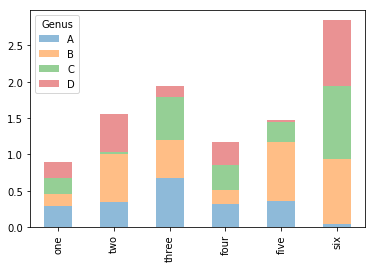

In [31]:
df.plot(kind='bar', stacked=True, alpha=0.5)

In [41]:
tips = pd.read_csv('ch08/tips.csv')

In [42]:
party_counts = pd.crosstab(tips.day, tips.size)

In [43]:
party_counts

col_0,1708
day,
Fri,19
Sat,87
Sun,76
Thur,62


### 直方图和密度图
直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间距均匀的面元中，绘制的是个面元中的数据点的数量。以前面小费数据为例，通过Series的hist方法，我们可以生成一张“小费占小费总额百分比”的直方图：

In [45]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

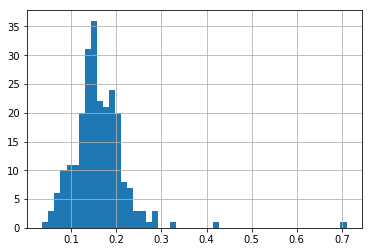

In [48]:
tips['tip_pct'].hist(bins=50)

与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（诸如正态（高斯）分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate核密度估计）图。

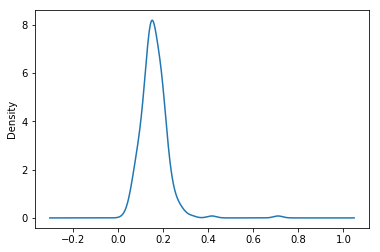

In [51]:
tips['tip_pct'].plot(kind='kde')

这两种图表常常被画在一起。直方图以规格化形式给出（以便给出面元化密度），然后再在其上绘制核密度估计。

接下来看一下由两个不同的标准正态分布组成的双峰分布：

In [54]:
# N(0, 1)
comp1 = np.random.normal(0, 1, size=200)

In [56]:
# N(10, 4)
comp2 = np.random.normal(10, 2, size=200)

In [58]:
values = Series(np.concatenate([comp1, comp2]))

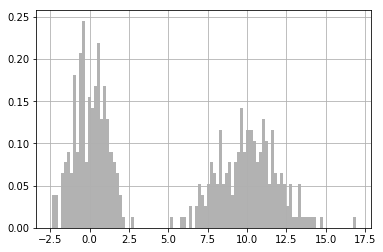

In [61]:
values.hist(bins=100, alpha=0.3, color='k', density=True)

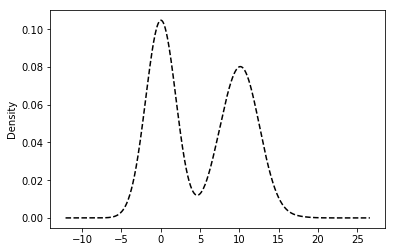

In [62]:
values.plot(kind='kde', style='k--')

### 散布图
散布图（scatter plot）是观察两个一维数据序列之间的关系的有效手段。matplotlib的scatter方法是绘制散布图的主要方法。在下面的例子中，我加载了来自statsmodels项目的macrodata数据集，选中其中几列，然后计算对数差：

In [64]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

In [65]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs. log unemp')

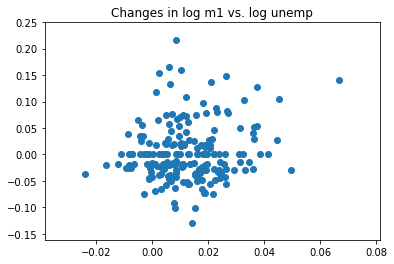

In [66]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散步矩阵（scatter plot matrix）。纯手工创建者这样的图表很费工夫，所以pandas提供了一个能从DataFrame创建散布图矩阵的scatter_matrix函数。它还支持在对角线上放置各变量的直方图或密度图：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000188C4A90>,
      dtype=object)

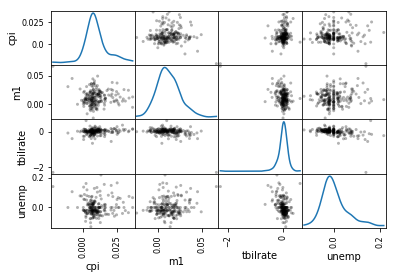

In [68]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)